# Bagging

![](banner_bagging.jpg)

_<p style="text-align: center;"> A committee of general experts determines the winner. </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("segment", list(size=0.2, colour="black"))

.................................................... start of document ....................................................

## Introduction

An ensemble method is a model construction method that combines several predictive models to build a new predictive model.

**Bootstrap aggregating** combines models built using a single data analytic method, a single set of hyper-parameter values, but different data samples.

## Data

Consider this pedagogical dataset and new unclassified observation.  The scatterplot shows the observations jittered to expose those with identical x1, x2 values.

observations,variables
72,3


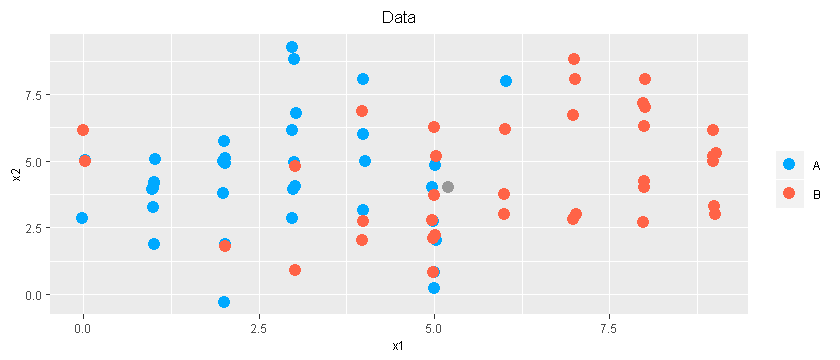

In [2]:
data = data.frame(x1=c(1,2,3,4,3,2,5,4,3,2,5,3,3,2,3,1,1,5,4,1,5,1,0,0,1,2,2,5,1,3,1,2,3,4,5,6,3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,6,9,8,7,7,8,8,9,9,7,7,5,5,8,8,9,8),
                  x2=c(3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,3,2,4,3,5,4,6,5,1,2,3,4,5,4,3,4,8,1,2,3,4,3,2,5,4,3,6,5,3,3,2,3,6,7,5,4,6,5,7,8,9,8,7,6,5,7,3,1,2,3,4,5,6),
                  class=c("A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B"))
new = data.frame(x1=5.2, x2=4)

set.seed(0)
size(data)
ggplot(data) + ggtitle("Data") +
geom_jitter(aes(x=x1, y=x2, color=class), height=0.3, width=0.03) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

## Model Based on Original Data

Here is a decision tree model built using the original dataset.  We can use the model to predict the class of the new observation.

probability 
 
 
 A 
 B 
 
 
 
 
 0.4615385 
 0.5384615 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted 
 
 
 
 
 5.2 
 4 
 B

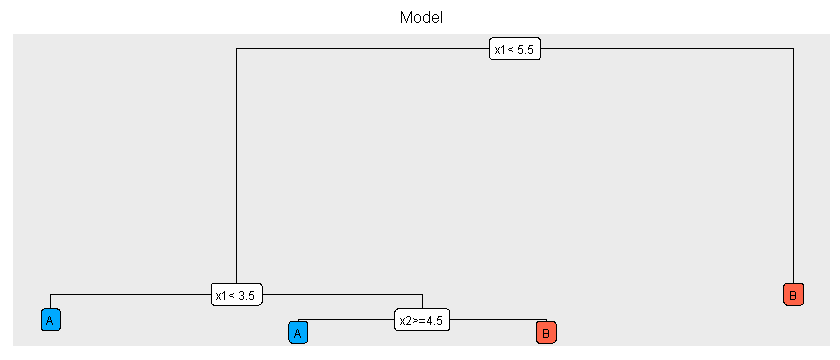

In [3]:
model = rpart(class ~ x1+x2, data, method="class")
prob = predict(model, new, type="prob")
class.predicted = as.class(prob, "A", cutoff=0.5)

layout(fmt(prob, "probability"), fmt(data.frame(new, class.predicted), "new"))

ggtree(model) + ggtitle("Model")

## Bootstrap Aggregating (Bagging)


Build a model comprising other constituent models, which are all built using a single model constrcution method and set of hyper-parameter values, but based on different bootstrap samples from the dataset.  The resulting combination of models makes predictions based on the most popular of the constituent models' predictions.

You can think of a bootstrap aggregated model as a committee of experts.  Each expert has studied a particular field of knowledge, different from (but possibly overlapping with) those that the other experts have studied. 

Bootstrap aggregating is also known as "bagging".  

### Bootstrap Samples

A bootstrap sample from a dataset is a set of randomly selected observations from that dataset, with replacement allowed.  The number of observations in the bootstrap sample should be the same as the number of observations in the data.  Usually, many of the observations in the bootstrap sample are duplicates of each other.

Here we take 3 different bootstrap samples from the dataset.

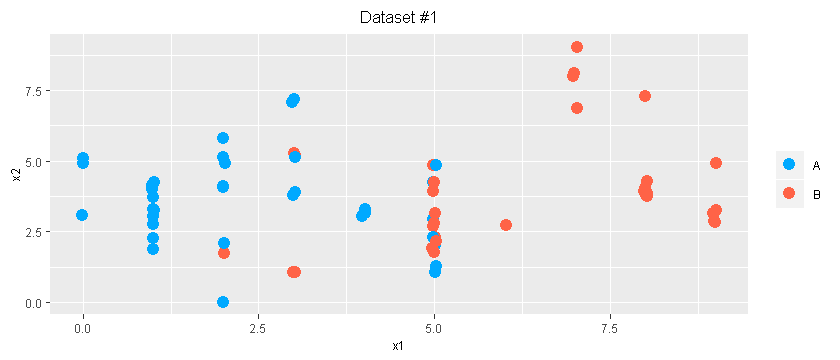

In [4]:
set.seed(1)
data.1 = sample_n(data, nrow(data), replace=TRUE)

ggplot(data.1) + ggtitle("Dataset #1") +
geom_jitter(aes(x=x1, y=x2, color=class), height=0.3, width=0.03)

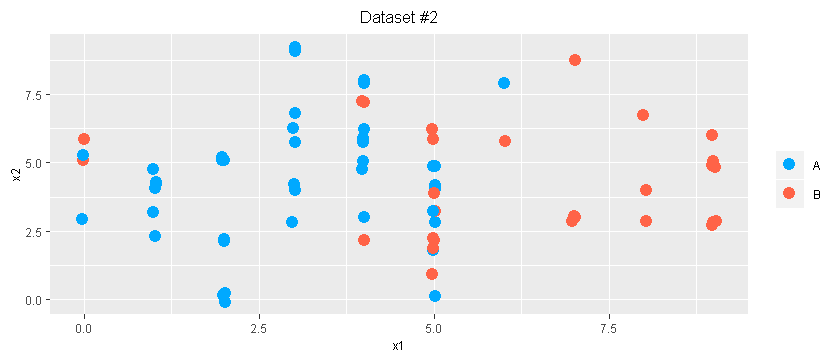

In [5]:
set.seed(6)
data.2 = sample_n(data, nrow(data), replace=TRUE)

ggplot(data.2) + ggtitle("Dataset #2") +
geom_jitter(aes(x=x1, y=x2, color=class), height=0.3, width=0.03)

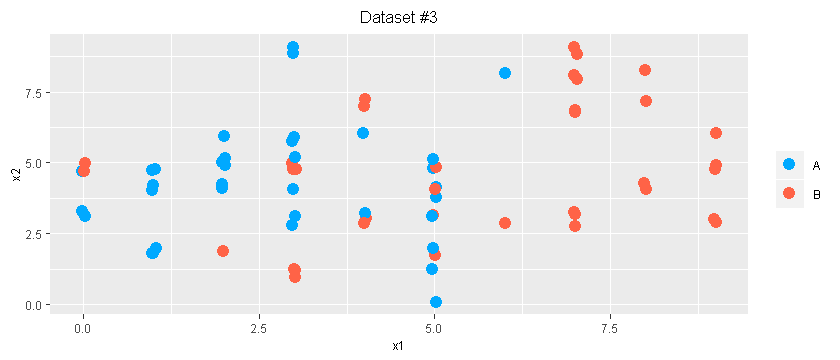

In [6]:
set.seed(9)
data.3 = sample_n(data, nrow(data), replace=TRUE)

ggplot(data.3) + ggtitle("Dataset #3") +
geom_jitter(aes(x=x1, y=x2, color=class), height=0.3, width=0.03)

### Models Based on Bootstrap Samples

We can build several models, using the same method and hyper-parameter values, but based on the different bootstrap samples of data.  Each model is an "expert" on the particular subset of the dataset represented in the bootstrap sample on which it is based.

Here we build 3 such models.

**Model #1**

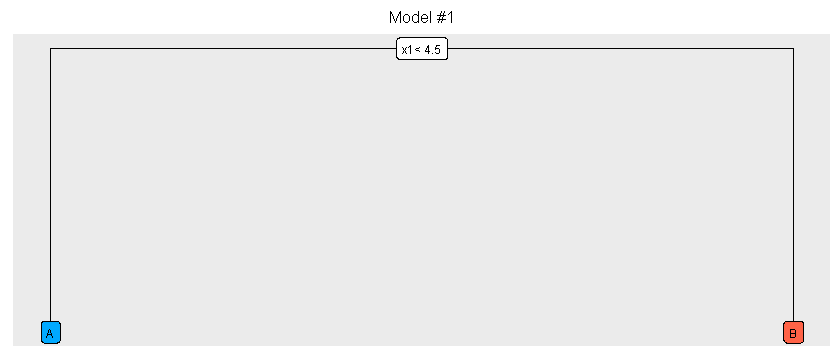

In [7]:
model.1 = rpart(class ~ x1+x2, data.1, method="class")
ggtree(model.1) + ggtitle("Model #1")

**Model #2**

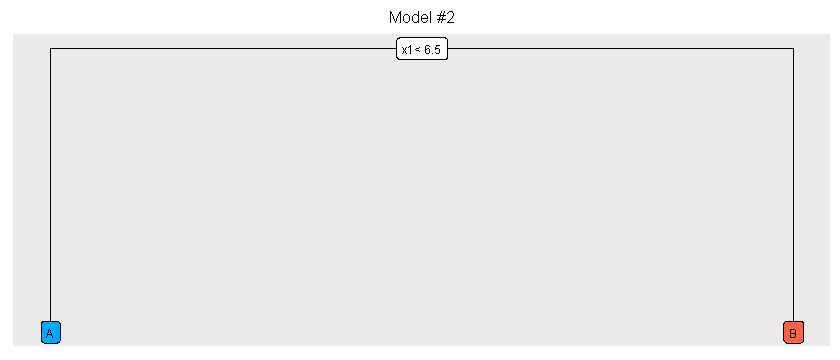

In [8]:
model.2 = rpart(class ~ x1+x2, data.2, method="class")
ggtree(model.2) + ggtitle("Model #2")

**Model #3**

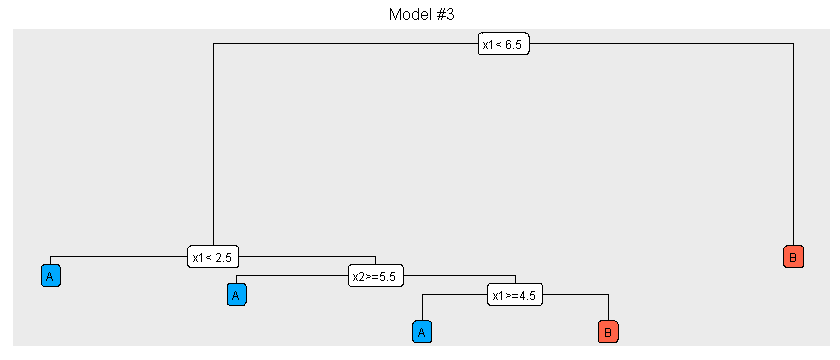

In [9]:
model.3 = rpart(class ~ x1+x2, data.3, method="class")
ggtree(model.3) + ggtitle("Model #3")

### Predictions

 We use the 3 models to make 3 different predictions of the new observation's class.

**Model #1**

New observation's class predicted by Model 1: 

In [10]:
prob.1 = predict(model.1, new, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)

layout(fmt(prob.1), fmt(data.frame(new, class.predicted.1), "new"))

prob.1 
 
 
 A 
 B 
 
 
 
 
 0.1842105 
 0.8157895 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.1 
 
 
 
 
 5.2 
 4 
 B

**Model #2**

New observation's class predicted by Model 2: 

In [11]:
prob.2 = predict(model.2, new, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)

layout(fmt(prob.2), fmt(data.frame(new, class.predicted.2), "new"))

prob.2 
 
 
 A 
 B 
 
 
 
 
 0.754386 
 0.245614 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.2 
 
 
 
 
 5.2 
 4 
 A

**Model #3**

New observation's class predicted by Model 3: 

In [12]:
prob.3 = predict(model.3, new, type="prob")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5)

layout(fmt(prob.3), fmt(data.frame(new, class.predicted.3), "new"))

prob.3 
 
 
 A 
 B 
 
 
 
 
 0.6153846 
 0.3846154 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.3 
 
 
 
 
 5.2 
 4 
 A

### Vote

We compare the predictions of the models and vote for the most popular prediction.  Models #1 and #2 predict that the new observation's class is A, and model #3 predicts B.  The vote is 2 to 1 in favor of A, so the bootstrap aggregated model predicts A.

In [13]:
fmt(data.frame(new, class.predicted.1, class.predicted.2, class.predicted.3,
               class.predicted=vote(class.predicted.1, class.predicted.2, class.predicted.3)),
    "new")

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3,class.predicted
5.2,4,B,A,A,A


## Code

### Useful Functions

In [38]:
# vote       # from setup.R
# focus_data # from setup.R

## Expectations

Know about this:
* How to bootstrap aggregate a classification method, conceptually and using R.
* How to boost a classification method, conceptually and using R.
* How to stack classification methods, conceptually and using R.

## Further Reading

* http://ciml.info/dl/v0_99/ciml-v0_99-ch13.pdf
* https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/
* https://en.wikipedia.org/wiki/Ensemble_learning

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised February 19, 2021
</span>
</p>